In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\jatin\OneDrive\Desktop\Loan-Approval\data\raw\train.csv')

In [3]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


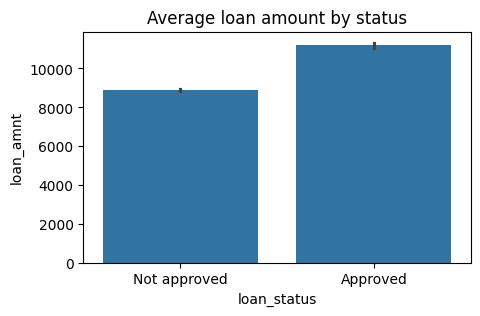

In [6]:
plt.figure(figsize=(5, 3))
sns.barplot(data=df, x="loan_status", y="loan_amnt")
plt.title("Average loan amount by status")
plt.xticks(ticks=[0,1],labels=["Not approved","Approved"],)
plt.show()

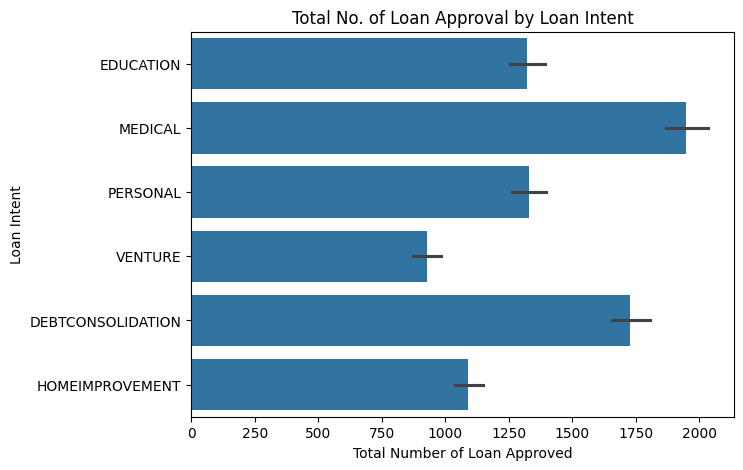

In [7]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, y="loan_intent", x='loan_status', estimator=np.sum)
plt.title("Total No. of Loan Approval by Loan Intent")
plt.ylabel("Loan Intent")
plt.xlabel("Total Number of Loan Approved")
plt.show()

Text(0, 0.5, '')

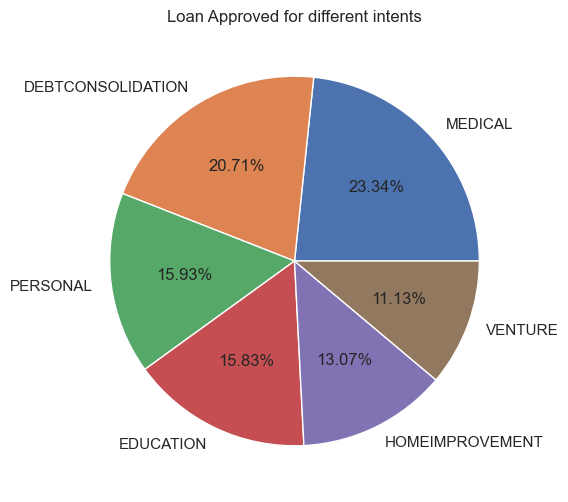

In [8]:
temp = df.groupby(by=['loan_intent'])['loan_status'].sum()
temp = temp.sort_values(ascending=False)
plt.figure(figsize=(7,5))
# plt.pie(temp, labels=temp.index, autopct='%.2f')
sns.set()
temp.plot(kind="pie", figsize=[6,6], title="Loan Approved for different intents", autopct = '%.2f%%')
plt.ylabel("")

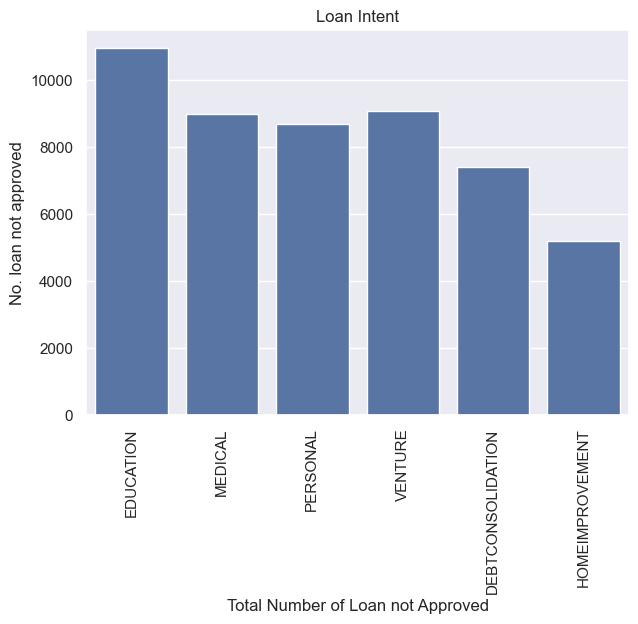

In [9]:
temp = df[df['loan_status']==0]

plt.figure(figsize=(7,5))
sns.countplot(data=temp, x="loan_intent")
plt.title("Loan Intent")
plt.ylabel("No. loan not approved")
plt.xticks(rotation=90)
plt.xlabel("Total Number of Loan not Approved")
plt.show()

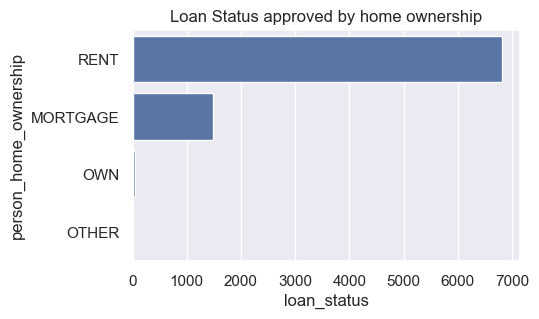

In [10]:
temp = df[df['loan_status']==1]
plt.figure(figsize=(5, 3))
sns.barplot(data=temp, x="loan_status", y="person_home_ownership", estimator=np.sum)
plt.title("Loan Status approved by home ownership")
plt.show()

In [11]:
def check(x):
    if x == 1:
        return "Yes"
    else:
        return "No"
    
temp = df.copy()
temp['loan_status'] = df['loan_status'].apply(check)

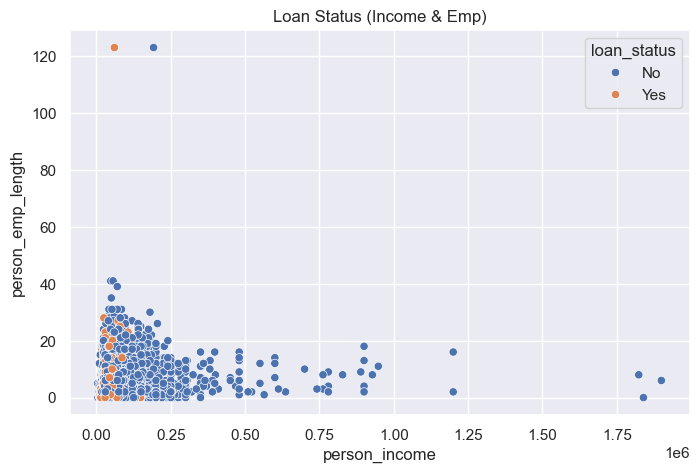

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=temp, x="person_income", y="person_emp_length", hue='loan_status')
plt.title("Loan Status (Income & Emp)")
plt.show()

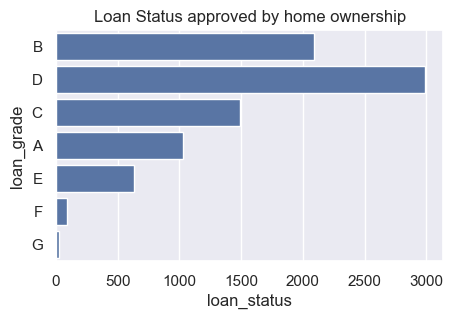

In [13]:
temp = df[df['loan_status']==1]
plt.figure(figsize=(5, 3))
sns.barplot(data=temp, x="loan_status", y="loan_grade", estimator=np.sum)
plt.title("Loan Status approved by home ownership")
plt.show()

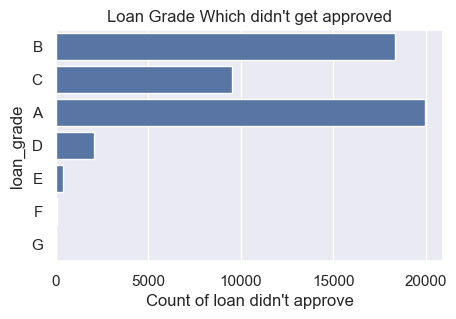

In [14]:
temp = df[df['loan_status']==0]
plt.figure(figsize=(5, 3))
sns.countplot(data=temp, y="loan_grade")
plt.title("Loan Grade Which didn't get approved")
plt.xlabel("Count of loan didn't approve")
plt.show()

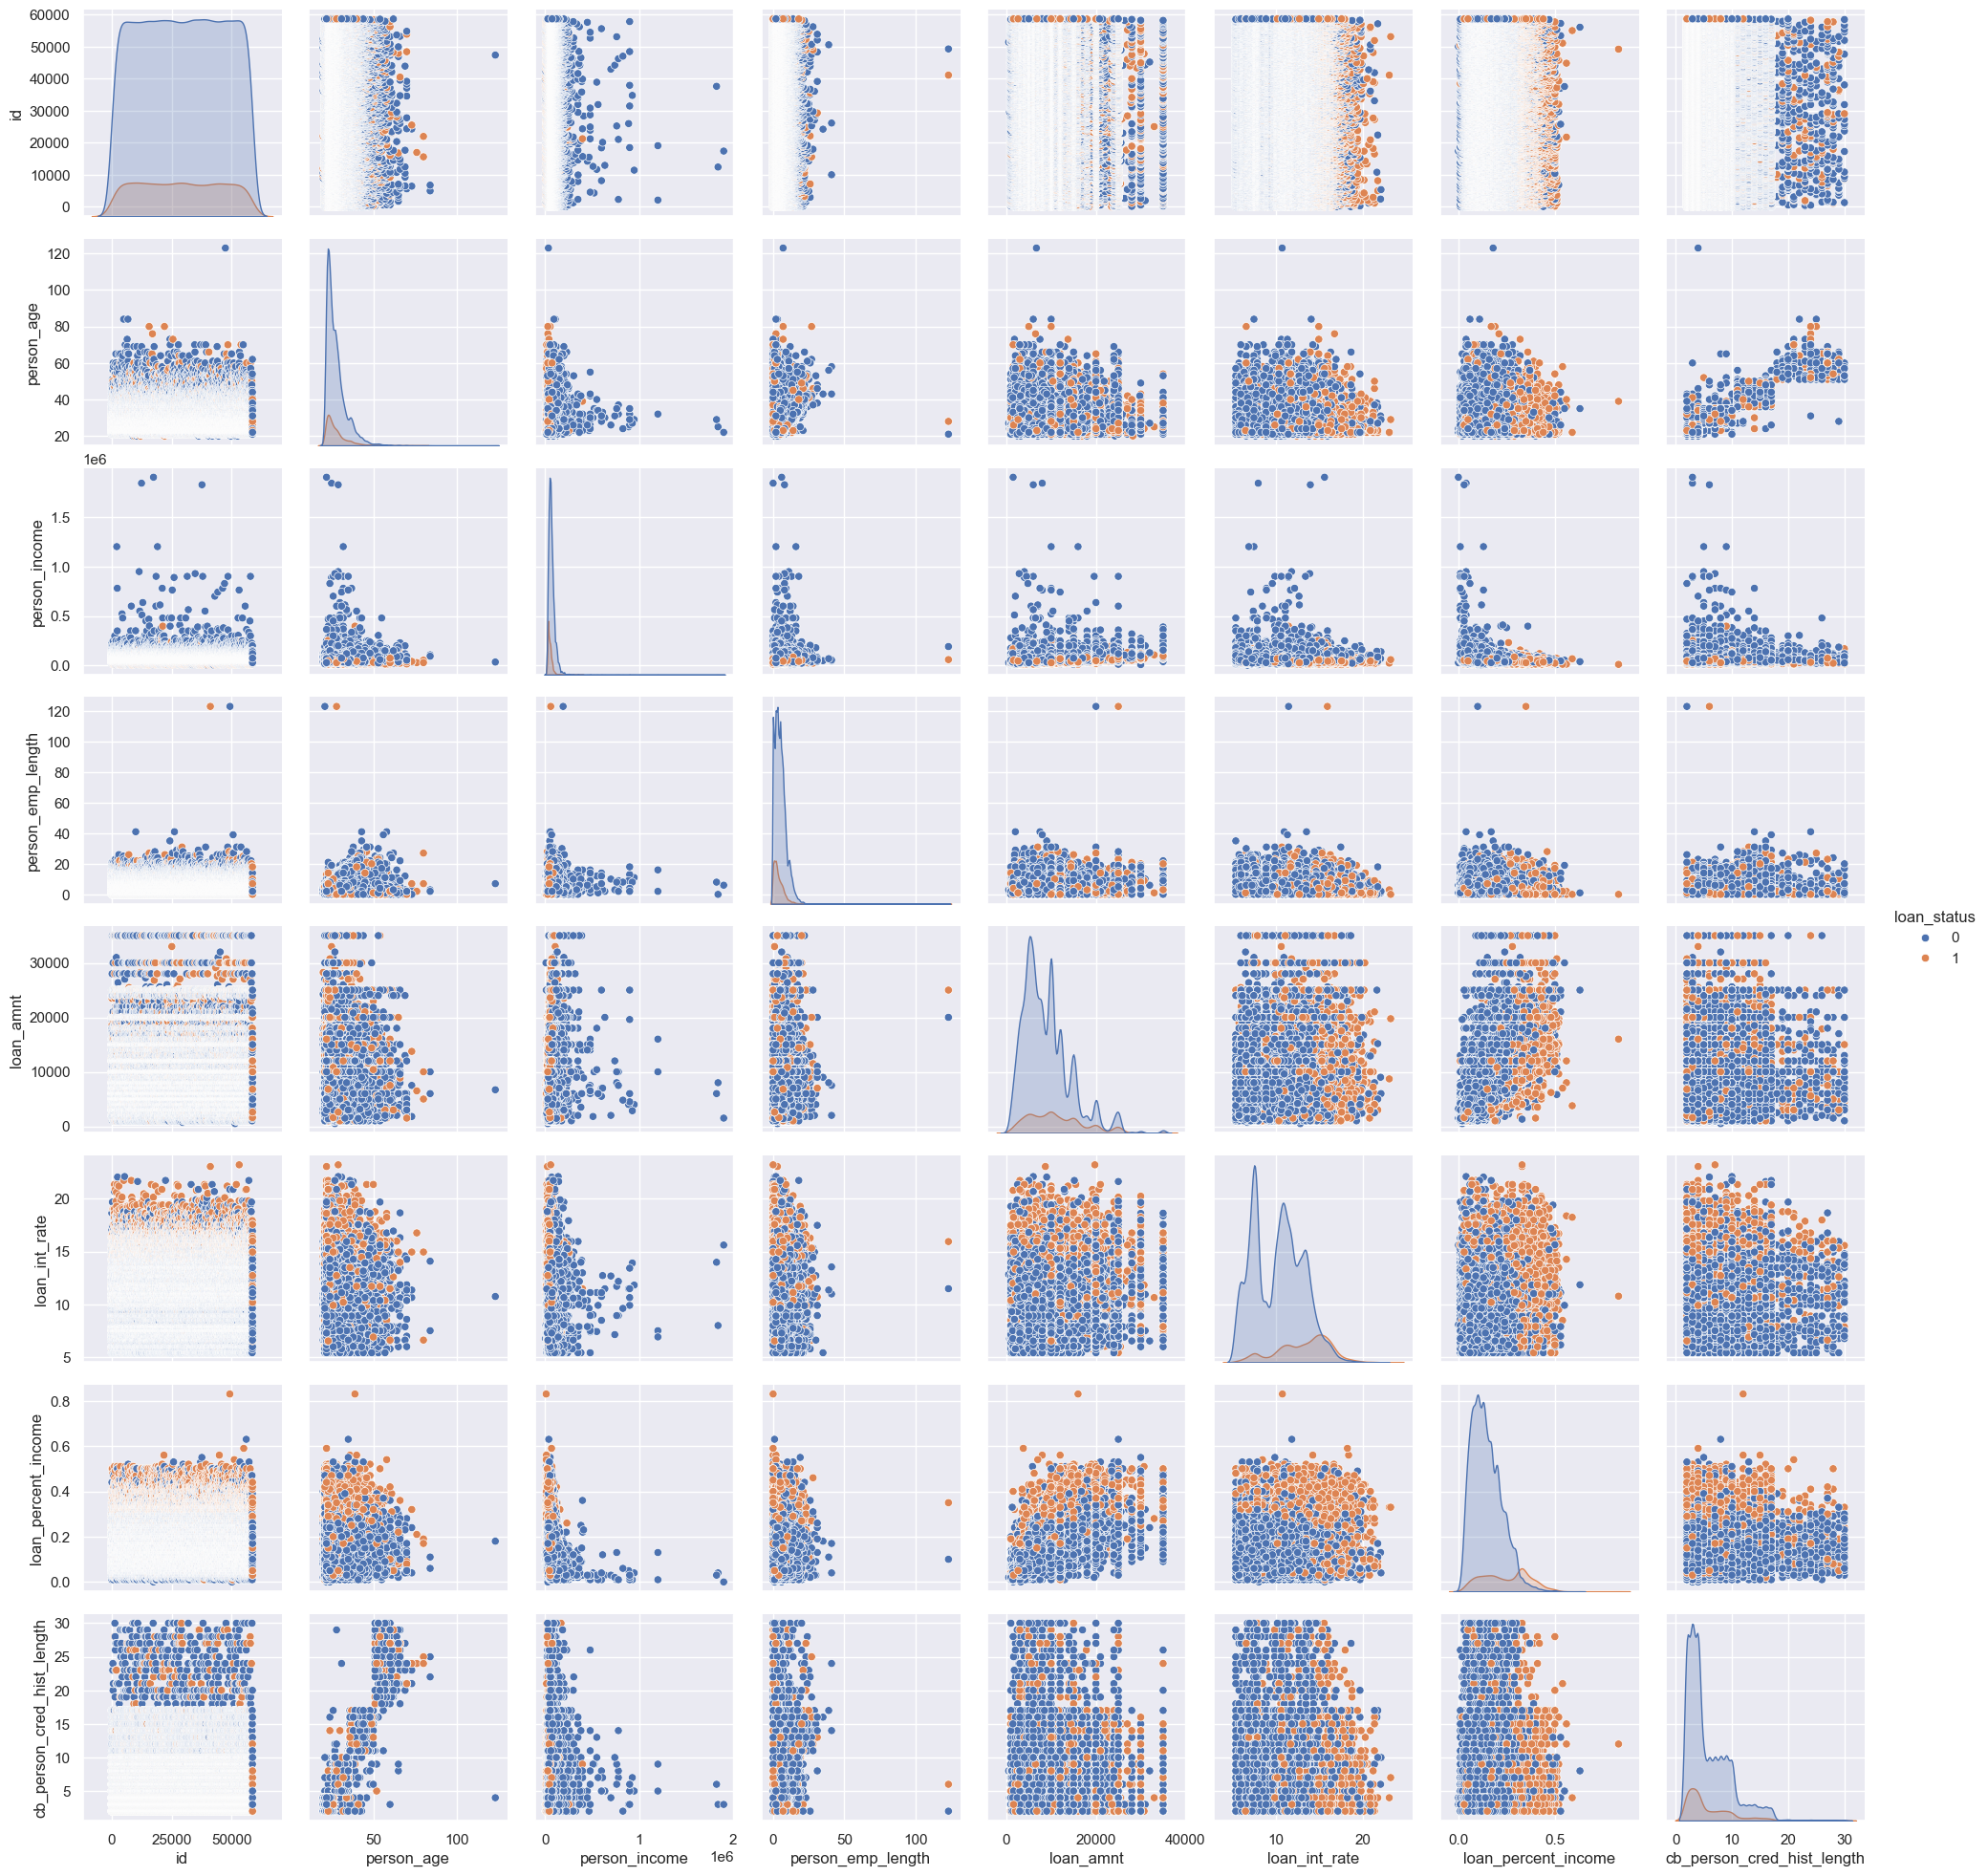

In [15]:
temp = df.copy()
temp['loan_status'] = df['loan_status'].apply(check)
sns.pairplot(data=df, hue="loan_status")